In [1]:
boston_df = read.csv('/home/jovyan/Project3/data/bostonhousing.csv', header=FALSE, sep='')

colnames(boston_df) = c('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black','lstat', 'medv')

In [2]:
head(boston_df,5)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
library(dplyr, warn.conflicts = FALSE)
library(moments)

In [4]:
stats = data.frame(feature=colnames(boston_df))
stats['mean_'] = sapply(boston_df, mean)
stats['sd_'] = sapply(boston_df, sd)
stats['skewness_'] = sapply(boston_df, skewness)
stats

feature,mean_,sd_,skewness_
crim,3.61352356,8.6015451,5.2076524
zn,11.36363636,23.3224530,2.2190631
indus,11.13677866,6.8603529,0.2941463
chas,0.06916996,0.2539940,3.3957993
nox,0.55469506,0.1158777,0.7271442
rm,6.28463439,0.7026171,0.4024147
age,68.57490119,28.1488614,-0.5971856
dis,3.79504269,2.1057101,1.0087788
rad,9.54940711,8.7072594,1.0018335
tax,408.23715415,168.5371161,0.6679683


In [5]:
boston_sc_df = data.frame(scale(boston_df))

In [6]:
stats_sc = data.frame(feature=colnames(boston_sc_df))
stats_sc['mean_'] = sapply(boston_sc_df, mean)
stats_sc['sd_'] = sapply(boston_sc_df, sd)
stats_sc

feature,mean_,sd_
crim,-7.202981e-18,1
zn,2.282481e-17,1
indus,1.595296e-17,1
chas,-3.544441e-18,1
nox,-2.150022e-16,1
rm,-1.056462e-16,1
age,-1.643357e-16,1
dis,1.153079e-16,1
rad,4.799652e-17,1
tax,2.024415e-17,1


Sampling 5 instances

In [23]:
set.seed(7)

In [24]:
sample_2 = sample_n(boston_df, 5)

In [25]:
stats1 = data.frame(feature=colnames(sample_2))
stats1['mean_'] = sapply(sample_2, mean)
stats1['sd_'] = sapply(sample_2, sd)
stats1['skewness_'] = sapply(sample_2, skewness)
stats1

feature,mean_,sd_,skewness_
crim,0.110754,0.08054502,0.3423742
zn,24.000000,41.14000486,1.2702622
indus,9.580000,9.44637497,1.1542683
chas,0.000000,0.00000000,NaN
nox,0.504200,0.07955627,-0.1056318
rm,6.240200,0.50683054,1.4064773
age,56.780000,33.76295307,-0.2844507
dis,4.682720,2.82374169,0.3316182
rad,4.800000,2.38746728,0.1380232
tax,308.800000,88.79583324,-0.1754742


In [26]:
sample_sc_df = data.frame(scale(sample_2))

In [ ]:
stats_sc1 = data.frame(feature=colnames(sample_sc_df))
stats_sc1['mean_'] = sapply(sample_sc_df, mean)
stats_sc1['sd_'] = sapply(sample_sc_df, sd)
stats_sc1['skewness_'] = sapply(sample_2, skewness)
stats_sc1; stats_sc

The stats vary quite a bit and are not close between the sample dataset and the original which is expected with such a small sample size.

Preparing a heatmap and a barplot of the sample and the zscores.

In [28]:
library(ggplot2)

In [29]:
library(repr)
options(repr.plot.width=6, repr.plot.height=2) 

In [30]:
source('multiplot.r')

In [31]:
scaled_v_original <- function (feature) {
    original_feature <- as.vector(sample_2[[feature]])
    scaled_feature <- as.vector(sample_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}


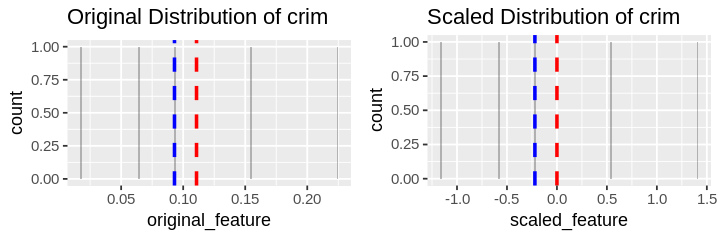

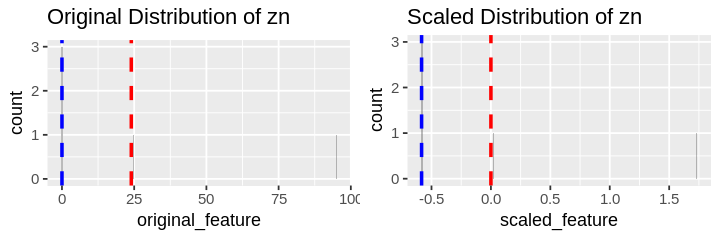

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

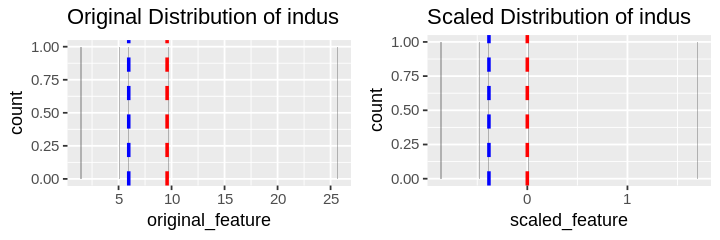

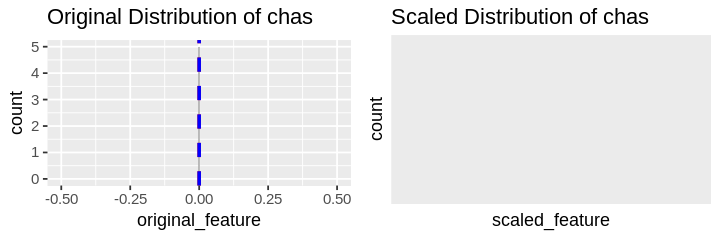

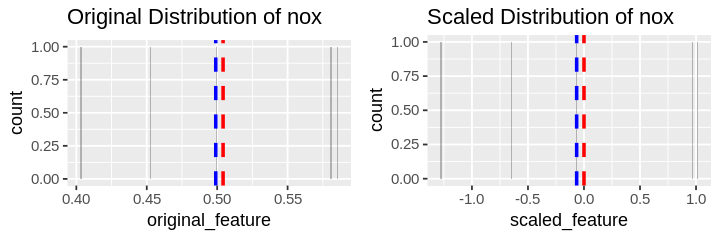

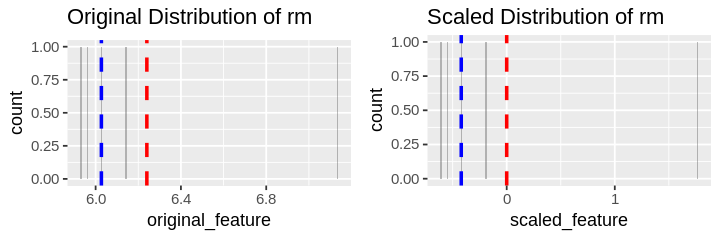

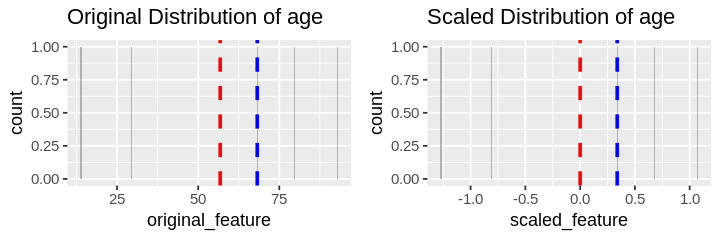

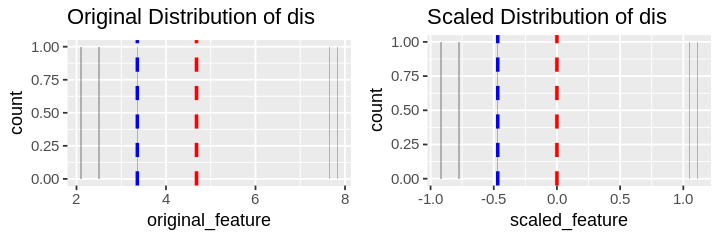

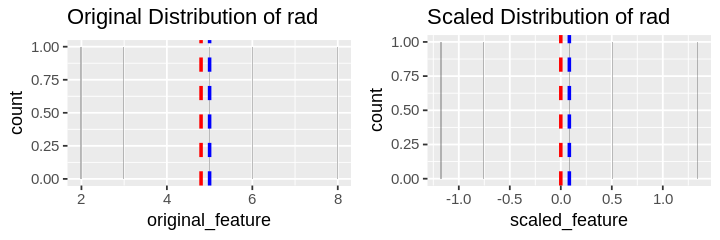

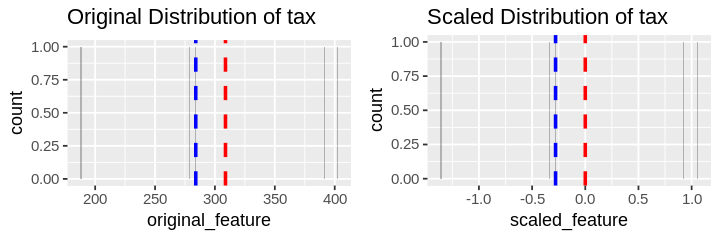

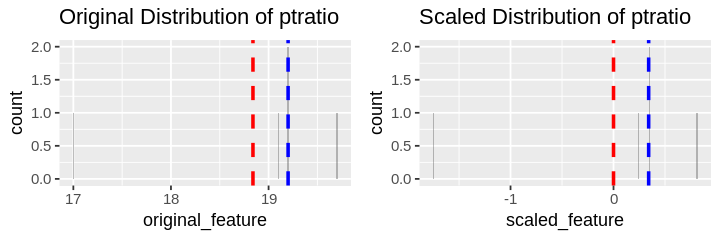

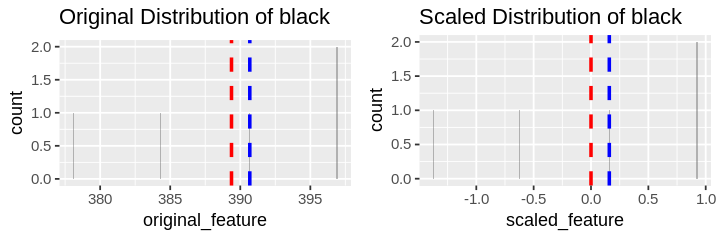

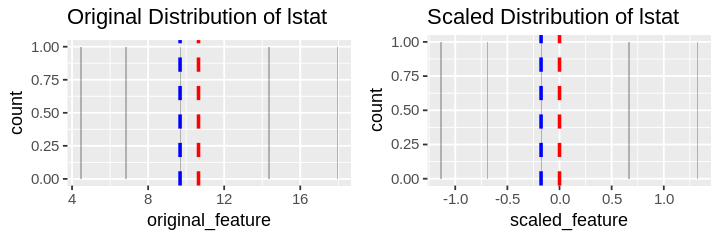

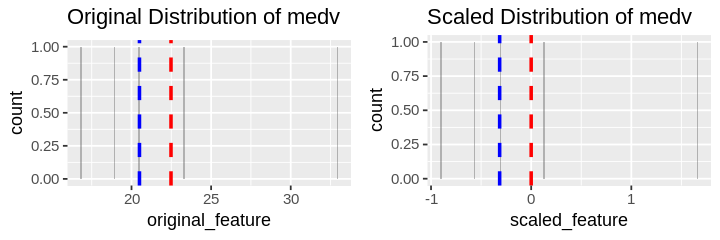

In [32]:
scaled_v_original('crim')
scaled_v_original('zn')
scaled_v_original('indus')
scaled_v_original('chas')
scaled_v_original('nox')
scaled_v_original('rm')
scaled_v_original('age')
scaled_v_original('dis')
scaled_v_original('rad')
scaled_v_original('tax')
scaled_v_original('ptratio')
scaled_v_original('black')
scaled_v_original('lstat')
scaled_v_original('medv')

In [33]:
library(reshape2)
cormat = cor(sample_2)

Warning message in cor(sample_2):
“the standard deviation is zero”

In [34]:
cormat[lower.tri(cormat)] <- NA

In [35]:
melted_cormat <- melt(cormat, na.rm = T)

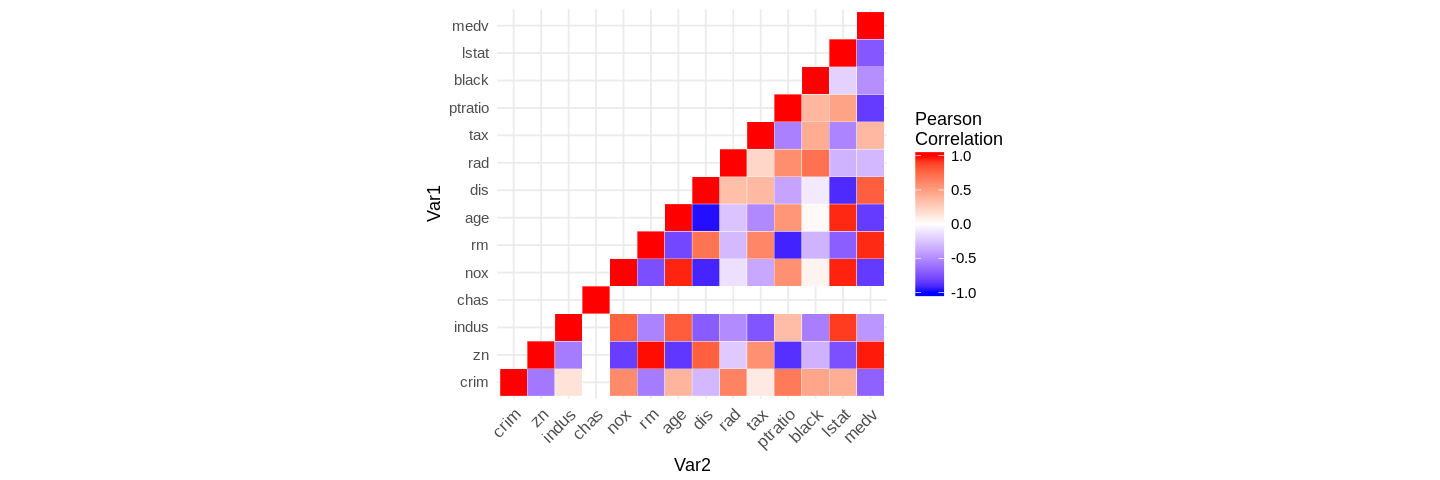

In [36]:
library(ggplot2)
library(repr)
options(repr.plot.width=12, repr.plot.height=4)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 10, hjust = 1))+
 coord_fixed()

Strong positive correlation between property taxes and the accessiblity of highways and strong negative correlation between the lower status of the population and the median value of the home can be observed.

In [39]:
boston_df[c(98,418,349,121,137)]; stats

ERROR: Error in `[.data.frame`(boston_df, c(98, 418, 349, 121, 137)): undefined columns selected


feature,mean_,sd_,skewness_
crim,3.61352356,8.6015451,5.2076524
zn,11.36363636,23.3224530,2.2190631
indus,11.13677866,6.8603529,0.2941463
chas,0.06916996,0.2539940,3.3957993
nox,0.55469506,0.1158777,0.7271442
rm,6.28463439,0.7026171,0.4024147
age,68.57490119,28.1488614,-0.5971856
dis,3.79504269,2.1057101,1.0087788
rad,9.54940711,8.7072594,1.0018335
tax,408.23715415,168.5371161,0.6679683


Number 98 is a 58 year old 7 bedroom home with a value higher than the median. It is not loacted on the river in a suburbian area with very few retail stores around and small highway accessibility. The location has a lower than median nitrogen oxide concentration, an average pupil-teacher ration and percentage of black people in the cummunity. With the high home value we are also seeing low percentage of lower status population in this location.

Number 418 is 90 year old 5 bedroom home with lower than median value in a high crime area. It is also not located at the river and has a large amount of retail stores in the area as well as high accessibility to highways. The location has a higher than median nitrogen oxide concentration, a higher than average pupil-teacher ratio and low percentage of black people in the cummunity. With the low home value we are also seeing high percentage of lower status population in this location.

Number 349, 121, and 137 are fairly similar home to number 98.

The median values for the various features are vastly different and cannot easily be compared to each other without standardization.